In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

In [61]:
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y = np.array([
    [0],
    [1],
    [1],
    [0]
])


In [62]:
np.random.seed(42)

input_size  = 2
hidden_size = 4
output_size = 1

W1 = np.random.randn(input_size, hidden_size) * 0.1
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size) * 0.1
b2 = np.zeros((1, output_size))


In [63]:
learning_rate = 0.5
epochs = 5000
loss_history = []


In [64]:
for epoch in range(epochs):

    # ----- Forward -----
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)

    z2 = a1 @ W2 + b2
    y_hat = sigmoid(z2)

    # ----- Loss -----
    loss = np.mean((y - y_hat)**2)
    loss_history.append(loss)

    # ----- Backprop -----
    dL = (y_hat - y)

    dz2 = dL * sigmoid_derivative(y_hat)
    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)

    da1 = dz2 @ W2.T
    dz1 = da1 * sigmoid_derivative(a1)
    dW1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # ----- Update -----
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    if epoch % 500 == 0:
        print("Epoch:", epoch, " Loss:", loss)


Epoch: 0  Loss: 0.25013239213983735
Epoch: 500  Loss: 0.2500006533415168
Epoch: 1000  Loss: 0.2500005128867235
Epoch: 1500  Loss: 0.25000040304151816
Epoch: 2000  Loss: 0.2500003150104241
Epoch: 2500  Loss: 0.2500002428156605
Epoch: 3000  Loss: 0.25000018226244514
Epoch: 3500  Loss: 0.2500001303161908
Epoch: 4000  Loss: 0.25000008471310353
Epoch: 4500  Loss: 0.2500000437076422


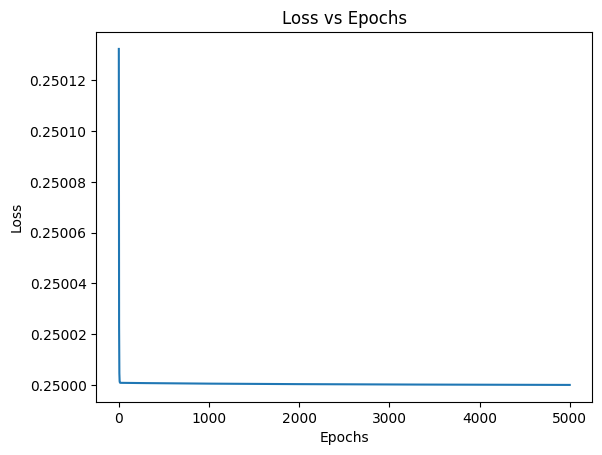

In [65]:
plt.figure()
plt.plot(loss_history)
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


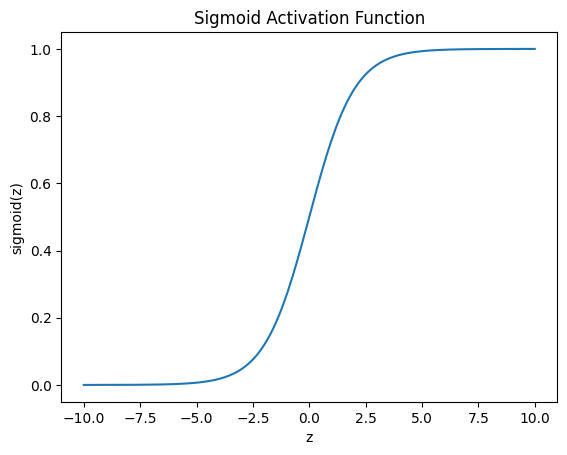

In [66]:
# Plot sigmoid activation

x_vals = np.linspace(-10,10,200)

plt.figure()
plt.plot(x_vals, sigmoid(x_vals))
plt.title("Sigmoid Activation Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.show()


In [67]:
test_input = np.array([[1,0]])

z1 = test_input @ W1 + b1
a1 = sigmoid(z1)

z2 = a1 @ W2 + b2
prediction = sigmoid(z2)

print("Test Input :", test_input)
print("Predicted Output :", prediction)


Test Input : [[1 0]]
Predicted Output : [[0.49994333]]
